<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

<img src="homeprices.jpg" style='height:200px;width:350px'>

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

We will use regression with multiple variables here. Price can be calculated using following equation,

<img src="equation.jpg" >

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [43]:
import numpy as np
a=np.arange(10)
np.linspace(1,10,33)

array([ 1.     ,  1.28125,  1.5625 ,  1.84375,  2.125  ,  2.40625,
        2.6875 ,  2.96875,  3.25   ,  3.53125,  3.8125 ,  4.09375,
        4.375  ,  4.65625,  4.9375 ,  5.21875,  5.5    ,  5.78125,
        6.0625 ,  6.34375,  6.625  ,  6.90625,  7.1875 ,  7.46875,
        7.75   ,  8.03125,  8.3125 ,  8.59375,  8.875  ,  9.15625,
        9.4375 ,  9.71875, 10.     ])

In [73]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [74]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [47]:
df.bedrooms.interpolate(method='pad')

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [66]:
df1=pd.Series([0,2,np.nan,8])
df1

0    0.0
1    2.0
2    NaN
3    8.0
dtype: float64

In [72]:
df1.interpolate(method='polynomial',order=2)

0    0.000000
1    2.000000
2    4.666667
3    8.000000
dtype: float64

In [37]:
import math
math.floor(df.bedrooms.median())

4

**Data Preprocessing: Fill NA values with median value of a column**

In [75]:
import math
med_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms.median()

4.0

In [76]:
df.bedrooms = df.bedrooms.fillna(med_bedrooms)

In [77]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

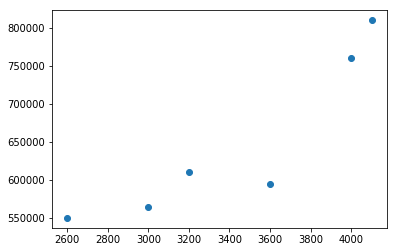

In [16]:
plt.scatter(df.area,df.price)

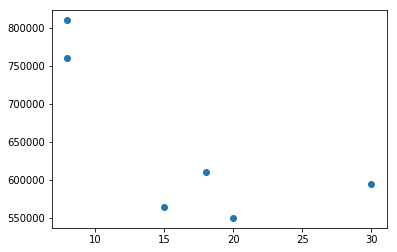

In [79]:
plt.scatter(df.age,df.price)

In [80]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [82]:
reg.intercept_

221323.00186540443

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [83]:
math.floor(reg.predict([[3000, 3, 40]]))

498408

In [55]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [54]:
reg.predict([[2500, 4, 5]])

array([ 578876.03748933])

<h3>Exercise<h3>

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


<h3>Answer<h3>

53713.86 and 93747.79